# Projeto 1
##  IBM - RH - Análise de desempenho e atritos de funcionários
Estudante: João Rodrigues

### Preparando o ambiente

In [1]:
# importando bibliotecas necessárias
import pandas as pd
import numpy as np

# graphs
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [35]:
# aqui a gente cala a boca do pandas e do sklearn
# importa o filtro
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

# monta o filtro
simplefilter("ignore", category=SettingWithCopyWarning)
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UndefinedMetricWarning)

In [3]:
# agora uma função que vai printar bonitinho as métricas
def print_metrics(model_name: str, y_test: np.ndarray, y_pred: np.ndarray, y_test_pca: np.ndarray, y_pred_pca: np.ndarray) -> str:
  """
  Returns the accuracy, precision and recall scores of the model
      
      Arguments:
          model_name {str} -- name of the model
          y_test {array} -- array of the test labels
          y_pred {array} -- array of the predicted labels
          y_test_pca {array} -- array of the test labels after PCA
          y_pred_pca {array} -- array of the predicted labels after PCA
      
      Returns:
          A formatted string containing the accuracy, precision and recall scores of the model for both non-PCA and PCA.
  
  """
  return (f'''
Acurácia do Modelo {model_name} sem PCA: {accuracy_score(y_test, y_pred):.4f}
Acurácia do Modelo {model_name} com PCA: {accuracy_score(y_test_pca, y_pred_pca):.4f}

Precisão do Modelo {model_name} sem PCA: {precision_score(y_test, y_pred, average='macro'):.4f}
Precisão do Modelo {model_name} com PCA: {precision_score(y_test_pca, y_pred_pca, average='macro'):.4f}

Recall (Sensibilidade) do Modelo {model_name} sem PCA: {recall_score(y_test, y_pred, average='macro'):.4f}
Recall (Sensibilidade) do Modelo {model_name} com PCA: {recall_score(y_test_pca, y_pred_pca, average='macro'):.4f}
''')

In [4]:
# carregando dados
dataset = pd.read_csv('ibm.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#checking first 10 rows
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Dicionário de Dados

Fonte: http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html#the_data

| Name |	Description |
| ---- | ---|
| AGE |	Numerical Value |
| ATTRITION |	Employee leaving the company (0=no, 1=yes) |
| BUSINESS TRAVEL |	(1=No Travel, 2=Travel Frequently, 3=Travel Rarely) |
| DAILY RATE |	Numerical Value - Daily Salary |
| DEPARTMENT |	(1=HR, 2=R&D, 3=Sales) |
| DISTANCE FROM HOME |	Numerical Value - THE DISTANCE FROM WORK TO HOME |
| EDUCATION |	Numerical Value |
| EDUCATION FIELD |	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL) |
| EMPLOYEE COUNT |	Numerical Value |
| EMPLOYEE NUMBER |	Numerical Value - EMPLOYEE ID |
| ENVIROMENT SATISFACTION |	Numerical Value - SATISFACTION WITH THE ENVIROMENT |
| GENDER |	(1=FEMALE, 2=MALE) |
| HOURLY RATE |	Numerical Value - HOURLY SALARY |
| JOB INVOLVEMENT |	Numerical Value - JOB INVOLVEMENT |
| JOB LEVEL |	Numerical Value - LEVEL OF JOB |
| JOB ROLE |	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES, EXECUTIVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION |	Numerical Value - SATISFACTION WITH THE JOB |
| MARITAL STATUS |	(1=DIVORCED, 2=MARRIED, 3=SINGLE) |
| MONTHLY INCOME |	Numerical Value - MONTHLY SALARY |
| MONTHLY RATE |	Numerical Value - MONTHLY RATE |
| NUMCOMPANIES WORKED |	Numerical Value - NO. OF COMPANIES WORKED AT |
| OVER 18 |	(1=YES, 2=NO) |
| OVERTIME |	(1=NO, 2=YES) |
| PERCENT SALARY HIKE |	Numerical Value - PERCENTAGE INCREASE IN SALARY |
| PERFORMANCE RATING |	Numerical Value - PERFORMANCE RATING |
| RELATIONS SATISFACTION |	Numerical Value - RELATIONS SATISFACTION |
| STANDARD HOURS |	Numerical Value - STANDARD HOURS |
| STOCK OPTIONS LEVEL |	Numerical Value - STOCK OPTIONS |
| TOTAL WORKING YEARS |	Numerical Value - TOTAL YEARS WORKED |
| TRAINING TIMES LAST YEAR |	Numerical Value - HOURS SPENT TRAINING |
| WORK LIFE BALANCE |	Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE |
| YEARS AT COMPANY |	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY |
| YEARS IN CURRENT ROLE |	Numerical Value -YEARS IN CURRENT ROLE |
| YEARS SINCE LAST PROMOTION |	Numerical Value - LAST PROMOTION |
| YEARS WITH CURRENT MANAGER |	Numerical Value - YEARS SPENT WITH CURRENT MANAGER |

### Pré-Processamento

In [7]:
# fase 1: convertendo string para inteiro

## criando variável turnover
dataset['turnover'] = dataset['Attrition'].replace({'Yes': 1, 'No': 0})

## convertendo BusinessTravel para inteiro
dataset['BusinessTravel'] = dataset['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

## convertendo 
# EDUCATION FIELD
# 1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL
dataset['EducationField'] = dataset['EducationField'].replace({'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3, 'Medical': 4, 'Other': 5, 'Technical Degree': 6})

# GENDER
# 1=FEMALE, 2=MALE
dataset['Gender'] = dataset['Gender'].replace({'Female': 1, 'Male': 2})

# department
# 	(1=HR, 2=R&D, 3=Sales)
dataset['Department'] = dataset['Department'].replace({'Sales': 3, 'Research & Development': 2, 'Human Resources': 1})

# job role
#	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= Manufacturing Director, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
dataset['JobRole'] = dataset['JobRole'].replace({'Sales Executive': 8, 'Research Scientist': 6, 'Laboratory Technician': 3,
       'Manufacturing Director': 5, 'Healthcare Representative': 1, 'Manager': 4,
       'Sales Representative': 9, 'Research Director': 6, 'Human Resources': 2})

# marital status
# (1=DIVORCED, 2=MARRIED, 3=SINGLE
dataset['MaritalStatus'] = dataset['MaritalStatus'].replace({'Married': 2, 'Single': 3, 'Divorced': 1})

# over 18
# 1=YES, 2=NO)
dataset['Over18'] = dataset['Over18'].replace({'Y': 1, 'N': 2})

# overtime
# 	(1=NO, 2=YES)
dataset['OverTime'] = dataset['OverTime'].replace({'Yes': 2, 'No': 1})

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Exercicio 1. (2 pontos)
Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.

In [9]:
dataset.corrwith(dataset['turnover'])

Age                        -0.159205
BusinessTravel              0.127006
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.069875
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
T

Olhando a correlação, eu separei as seguintes variáveis:

| Feature     |    Cof. de Corr. com turnover |
| ------------- | ------------------------------- |
| Age:          |                   -0.159205     |
| TotalWorkingYears: |               -0.171063    |
| MonthlyIncome: |                  -0.159840     |

Olhando para essas variáveis, eu posso supor que idade, tempo trabalhado e salário mensal impactam na presença da pessoa dentro da empresa por serem variáveis que sempre estão na mídia com relação ao mercado de trabalho.


<AxesSubplot:xlabel='turnover', ylabel='Age'>

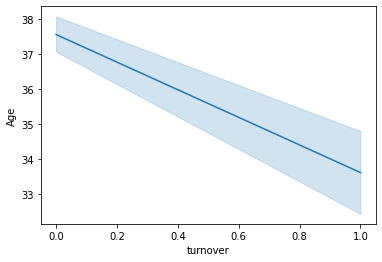

In [10]:
sns.lineplot(x='turnover', y='Age', data=dataset)

O gráfico acima mostra uma tendência que quanto menor a idade do funcionário, maior a chance dele sair da empresa. 

<AxesSubplot:xlabel='turnover', ylabel='TotalWorkingYears'>

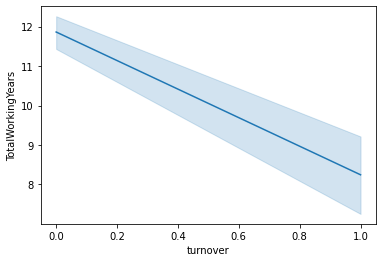

In [11]:
sns.lineplot(x='turnover', y='TotalWorkingYears', data=dataset)

O gráfico mostra uma tendência que quanto menos anos trabalhados na empresa, maior a chance de sair da empresa. Ou melhor dizendo, quanto mais tempo trabalhado, provavelmente há mais chances de desenvolver um trabalho melhor (evitando demissão) e/ou desenvolver lealdade ao negócio (evitando saída por escolha).

<AxesSubplot:xlabel='turnover', ylabel='MonthlyIncome'>

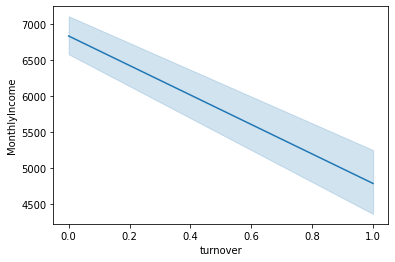

In [12]:
sns.lineplot(x='turnover', y='MonthlyIncome', data=dataset)

O gráfico mostra uma tendência de quanto menor o salário, maior as chances do funcionário sair da empresa. Talvez sejam funcionários que conseguiram outras oportunidades que pagam mais (como ocorre o tempo inteiro no mercado).

### Exercicio 2. (1 ponto)
Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

In [30]:
# separando dados para o rfe
X = dataset.drop(['Attrition', 'turnover', 'EmployeeNumber'], axis=1)
y = dataset['turnover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
#construindo e utilizando rfe
selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=8, step=1, verbose=0, importance_getter='auto')
selector = selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'OverTime', 'TotalWorkingYears'],
      dtype=object)

In [32]:
selector = RFE(LogisticRegression(random_state=42), n_features_to_select=8, step=1, verbose=0, importance_getter='auto')
selector = selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['BusinessTravel', 'Department', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime'],
      dtype=object)

As variáveis listadas pelo RFE com Árvore de Decisão são ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'TotalWorkingYears']. Entre elas estão as três variáveis que apontei hipóteses na questão 1: Age, MonthlyIncome e TotalWorkingYears.

Já o RFE utilizando uma Regressão Logística aponta as variáveis mais importantes como sendo ['BusinessTravel', 'Department', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime']. 

Uma possível explicação para a diferença está em como os dois algoritmos funcionam. Enquanto a Árvore de Decisão trabalha dividindo o conjunto de dados em cada vez mais "grupos" de tamanho cada vez menor ([Método da Bisseção](https://pt.wikipedia.org/wiki/M%C3%A9todo_da_bisse%C3%A7%C3%A3o)), a Regressão Logística trabalha traçando uma reta ([Logistic Regression versus Decision Trees](https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/#:~:text=Decision%20Trees%20bisect%20the%20space,generalize%20to%20planes%20and%20hyperplanes.)) que divide os dados em dois grupos, podendo generalizar mais fácil do que a Árvore de Decisão (que é mais sensível a overfitting).

In [36]:
#comparação entre regressão logística e árvore de decisão para este conjunto

#pca dos dados
X_std = StandardScaler().fit_transform(X)
X_std_pca = PCA(n_components=1).fit_transform(X_std)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y, test_size=0.3, random_state=42)

#árvore de decisão
modelDecisionTree_test = DecisionTreeClassifier(random_state=42)

### árvore sem pca
modelDecisionTree_test.fit(X_train, y_train)

### árvore com pca
modelDecisionTree_test.fit(X_train_pca, y_train_pca)
y_pred_pca = modelDecisionTree_test.predict(X_test_pca)

### métricas da árvore
print(print_metrics(model_name='Árvore de Decisão', y_test=y_test, y_pred=y_pred, y_test_pca=y_test_pca, y_pred_pca=y_pred_pca))

# regressão logística
modelLogisticRegression_test = LogisticRegression(random_state=42)

### regressão logística sem pca
modelLogisticRegression_test.fit(X_train, y_train)
y_pred = modelLogisticRegression_test.predict(X_test)

### regressão logistica com pca
modelLogisticRegression_test.fit(X_train_pca, y_train_pca)
y_pred_pca = modelLogisticRegression_test.predict(X_test_pca)

### métricas da regressão
print(print_metrics(model_name='Regressão Logística', y_test=y_test, y_pred=y_pred, y_test_pca=y_test_pca, y_pred_pca=y_pred_pca))



Acurácia do Modelo Árvore de Decisão sem PCA: 0.8594
Acurácia do Modelo Árvore de Decisão com PCA: 0.7324

Precisão do Modelo Árvore de Decisão sem PCA: 0.5982
Precisão do Modelo Árvore de Decisão com PCA: 0.5113

Recall (Sensibilidade) do Modelo Árvore de Decisão sem PCA: 0.5056
Recall (Sensibilidade) do Modelo Árvore de Decisão com PCA: 0.5145


Acurácia do Modelo Regressão Logística sem PCA: 0.8594
Acurácia do Modelo Regressão Logística com PCA: 0.8617

Precisão do Modelo Regressão Logística sem PCA: 0.5982
Precisão do Modelo Regressão Logística com PCA: 0.4308

Recall (Sensibilidade) do Modelo Regressão Logística sem PCA: 0.5056
Recall (Sensibilidade) do Modelo Regressão Logística com PCA: 0.5000



Considerando os resultados do teste acima, podemos dizer que a Regressão Logística tem resultados relativamente melhores do que a Árvore de Decisão na acurácia e tem uma perda mínima em Precisão e Sensibilidade. Por este motivo, estarei utilizando as variáveis definidas pelo RFE com Regressão Logística nas próximas questões.

### Exercicio 3. (2 pontos)
Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.

In [38]:
#split data
X = dataset[['BusinessTravel', 'Department', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime']]
X.head()

,BusinessTravel,Department,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,OverTime
0,1,3,1,3,2,4,3,2
1,2,2,2,2,2,2,2,1
2,1,2,2,2,1,3,3,2
3,2,2,1,3,1,3,2,2
4,1,2,2,3,1,2,2,1


In [39]:
#normalizando os dados
X_std = StandardScaler().fit_transform(X)

In [40]:
#instanciando modelo de árvore de decisão
modelTree = DecisionTreeClassifier(random_state=42)

In [41]:
X_std_pca_test = PCA(n_components='mle').fit(X_std)
X_std_pca_test.n_components_

1

Com o teste acima, utilizando o algoritmo MLE, percebemos que o PCA pode reduzir o número de variáveis de 8 para 1, reduzindo a complexidade e custo computacional do modelo.

In [42]:
#com pca
X_std_pca = PCA(n_components=1).fit_transform(X_std)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y, test_size=0.3, random_state=42)
modelTree.fit(X_train_pca, y_train_pca)
y_pred_pca = modelTree.predict(X_test_pca)

In [43]:
#sem pca
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
modelTree.fit(X_train, y_train)
y_pred = modelTree.predict(X_test)

In [44]:
print(print_metrics(model_name='Decision Tree', y_test=y_test, y_pred=y_pred, y_test_pca=y_test_pca, y_pred_pca=y_pred_pca))


Acurácia do Modelo Decision Tree sem PCA: 0.8186
Acurácia do Modelo Decision Tree com PCA: 0.7800

Precisão do Modelo Decision Tree sem PCA: 0.5893
Precisão do Modelo Decision Tree com PCA: 0.5357

Recall (Sensibilidade) do Modelo Decision Tree sem PCA: 0.5713
Recall (Sensibilidade) do Modelo Decision Tree com PCA: 0.5352



Comprovando os resultados do MLE, o PCA apresentou poucas perdas nas métricas, perdas essas que são aceitáveis por conta do custo computacional menor.

### Exercicio 4. (1 ponto)
Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?

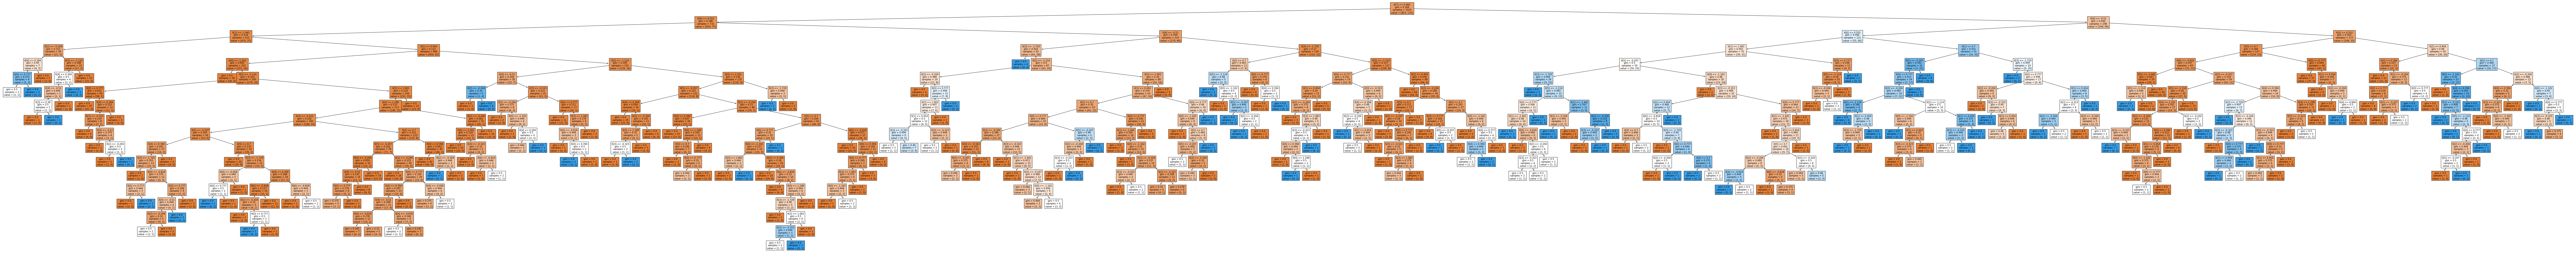

In [45]:
# construindo gráfico da árvore sem pca
plt.figure(figsize = [200,20])
plot_tree(modelTree,filled=True, fontsize=10) # pode usar ; pra calar a boca dos logs ao invés do plt.show()
plt.show()

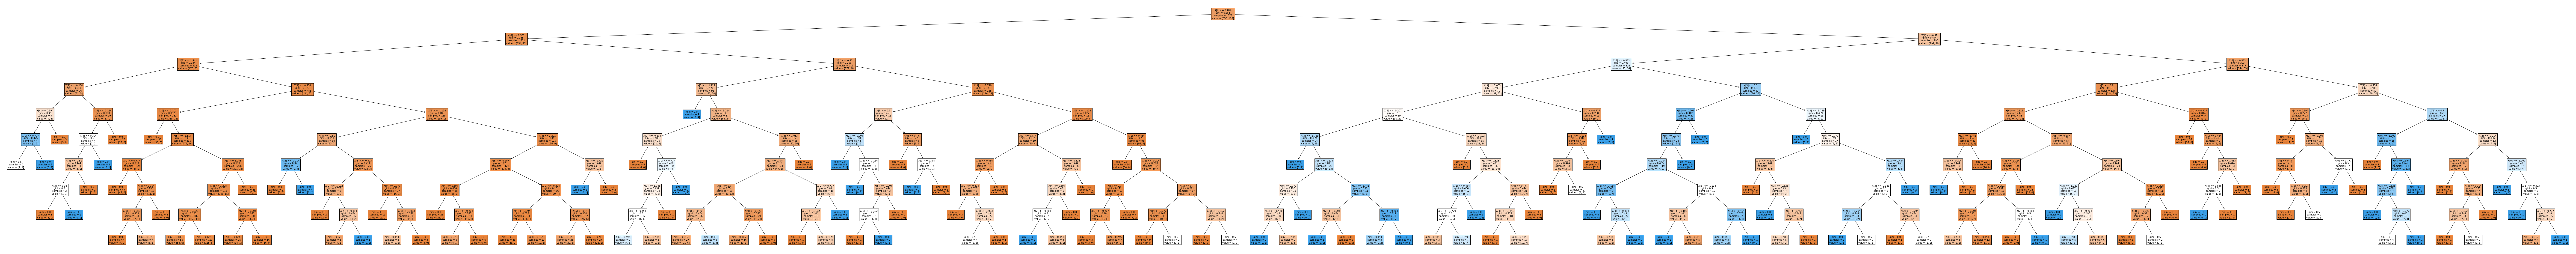

In [46]:
#modelo sem pca e podado
modelTree_podado = DecisionTreeClassifier(random_state=42,max_depth=9)
modelTree_podado.fit(X_train, y_train)
y_pred = modelTree_podado.predict(X_test)

# construindo gráfico da árvore sem pca e com poda
plt.figure(figsize = [200,20])
plot_tree(modelTree_podado,filled=True, fontsize=10) # pode usar ; pra calar a boca dos logs ao invés do plt.show()
plt.show()

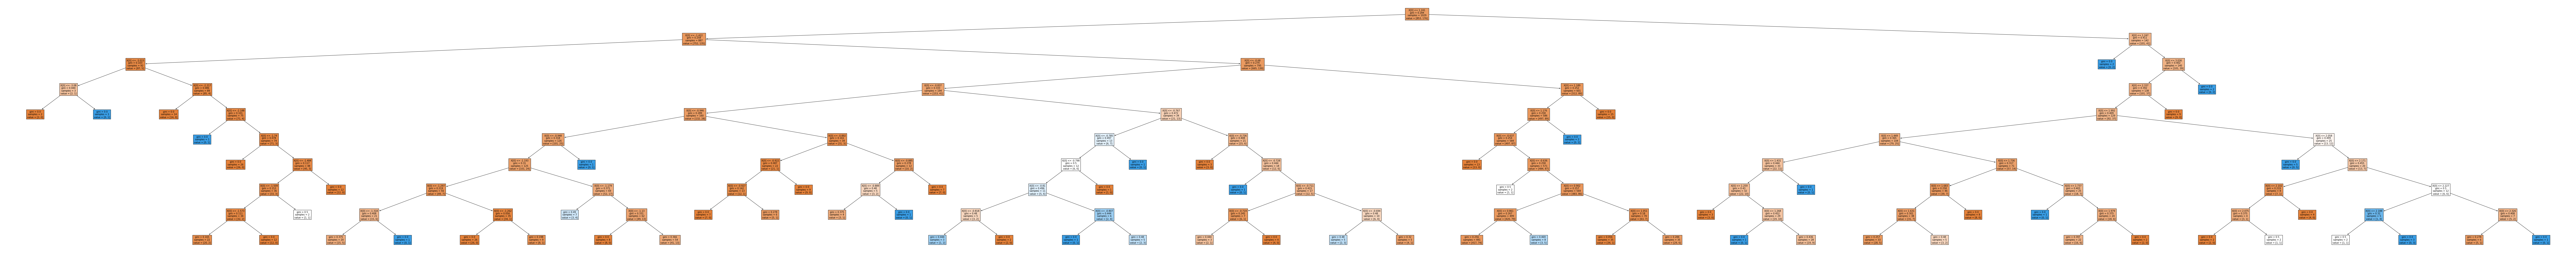

In [47]:
#modelo com pca e podado
modelTree_podado.fit(X_train_pca, y_train_pca)
y_pred_pca = modelTree_podado.predict(X_test_pca)

# construindo gráfico da árvore com pca e com poda
plt.figure(figsize = [200,20])
plot_tree(modelTree_podado,filled=True, fontsize=10) # pode usar ; pra calar a boca dos logs ao invés do plt.show()
plt.show()

**Explique o que é GINI e quais seriam as desvantagens?**

O coeficiente de Gini mede o nível de impureza no dataset, isto é, a probabilidade de uma observação do conjunto ser classificada erroneamente quando forem feitas amostragens aleatórias. Ainda falando sobre o Gini, uma das desvantagens é o Sample Bias.

Sample Bias: a validade do coeficiente de Gini depende do tamanho da amostra. Pequenas amostras podem ter valores menores de Gini enquanto amostras maiores podem ter valores maiores de Gini. 

Outra desvantagem do Gini é que pequenas mudanças no conjunto de dados (por exemplo, uma amostragem diferente para o treinamento) podem acarretar em grandes alterações da árvore final.



### Exercicio 5. (3 pontos)
**Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?**

Nas aulas, vimos o Random Forest e o AdaBoost. Ambos são métodos de ensemble que usam várias Árvore de Decisão para construir um único modelo melhor. A diferença está em como isso é feito. O Random Forest monta várias árvores e utiliza técnicas de bagging para separar os dados entre as árvores de forma que estas sejam o mais descorrelacionadas possível e também utiliza bagging para reunir os resultados e entregar uma única predição que geralmente tem uma acurácia maior. 

Já o AdaBoost monta árvores com o método de _"decision stump"_, isto é, árvores com um nó e duas folhas. A partir daí, o AdaBoost busca os melhores _decision stumps_ para montar uma árvore completa e vai corrigindo de forma iterativa os nós que obtiveram predições ruins. Por essa razão, o AdaBoost geralmente entrega um modelo mais acurado que o Random Forest, mas também é mais sensível a overfitting, uma vez que ele vai corrigindo os nós de forma iterativa. O método de construção de árvores do AdaBoost também é conhecido como "crescimento por folha".

Leitura Extra: [Differences between Random Forest vs AdaBoost](https://vitalflux.com/differences-between-random-forest-vs-adaboost/#:~:text=As%20a%20result%2C%20Adaboost%20typically,to%20overfitting%20than%20Random%20Forest.)

### Exercicio 6. (1 ponto)
Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?

In [48]:
dataset['Gender'].value_counts()

2    882
1    588
Name: Gender, dtype: int64

Eu não recomendaria o modelo para um setor de RH principalmente porque os dados não estão balanceados, há mais homens do que mulheres no dataset e isso poderia causar uma inclinação do modelo a penalizar/favorecer um ou outro nas previsões. Caso o dataset fosse mais balanceado e inclusivo, poderia recomendar como ferramenta de planejamento para que o RH pudesse entender quais profissionais deveria ter mais cuidado para conseguir reter talentos ao invés de usar a idade e gênero de entrevistados e quanto ganhariam caso fosse contratado para saber se sairia da empresa rapidamente e assim evitar até a contratação (partindo do pré-suposto que é mais barato contratar alguém que há mais chances de permanecer na empresa). 

Eu explicaria para o setor que modelos de aprendizado de máquina trabalham com probabilidades e por tanto não podem ter 100% de acurácia. A acurácia de 100% só é possível quando o modelo decora os dados, dessa forma, não há boas probabilidades no mundo real porque o modelo só sabe trabalhar com os dados históricos que foram utilizados para treinamento. Um exemplo disso é o caso do algoritmo da Amazon que recusou todos os currículos de mulheres porque os dados históricos alimentados na máquina continham mais homens do que mulheres.